## Using 7 Regression Models to Predict House Sales Price

In [1818]:
import pandas as pd
import string
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [1819]:
train = pd.read_csv('home_prices_train.csv')
test = pd.read_csv('home_prices_test.csv')
print('The training set contains {} data points. The test set contains {} data points'.format(len(train), len(test)))

The training set contains 1460 data points. The test set contains 1459 data points


In [1820]:
pd.set_option('display.max_columns', 100)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1821]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


[Text(0.5, 0, 'Overall House Quality'), Text(0, 0.5, 'Sale Price')]

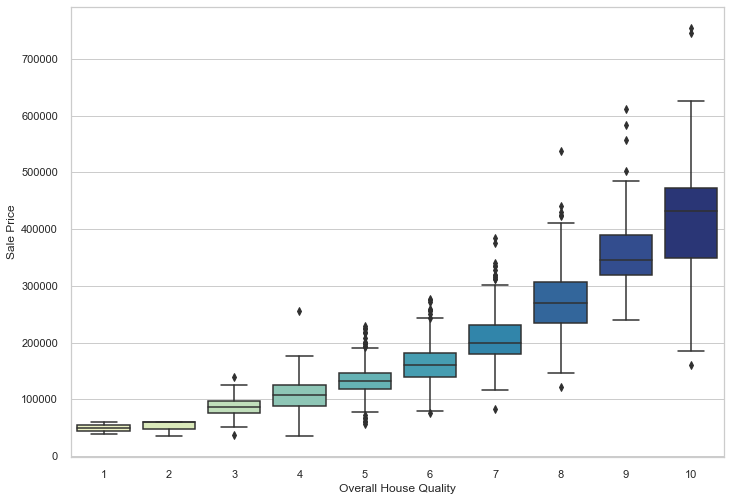

In [1822]:
# Visualize sales price to overall house quality
ax = sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='YlGnBu')
ax.set(xlabel='Overall House Quality', ylabel='Sale Price')

[Text(0.5, 0, 'Overall House Condition'), Text(0, 0.5, 'Sale Price')]

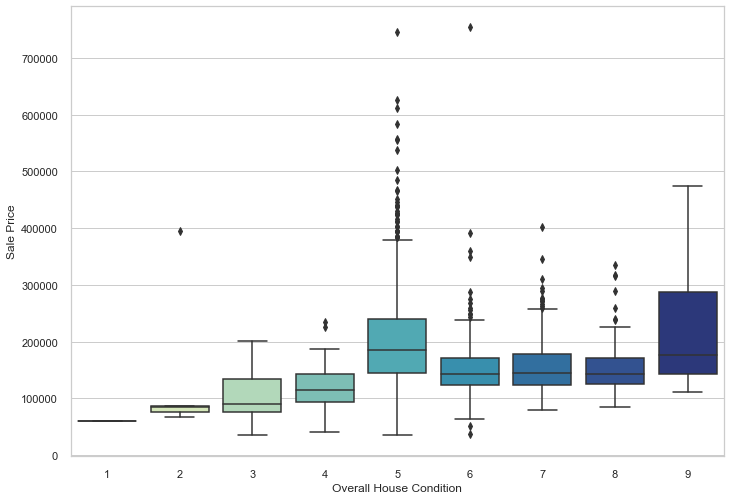

In [1823]:
# Visualize sales price to house condition
ax = sns.boxplot(x='OverallCond', y='SalePrice', data=train, palette='YlGnBu')
ax.set(xlabel='Overall House Condition', ylabel='Sale Price')

[Text(0.5, 0, 'Number Bedrooms'), Text(0, 0.5, 'Sale Price')]

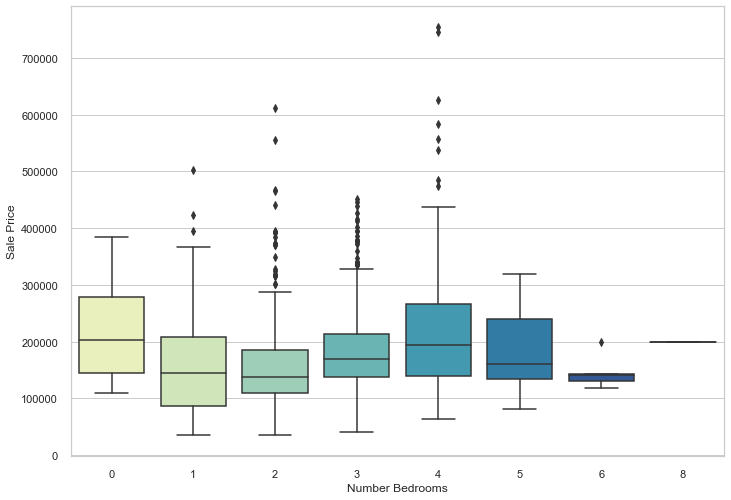

In [1824]:
# Visualize sales price to Bedrooms
ax = sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=train, palette='YlGnBu')
ax.set(xlabel='Number Bedrooms', ylabel='Sale Price')

[Text(0.5, 0, 'Number Full Bathrooms'), Text(0, 0.5, 'Sale Price')]

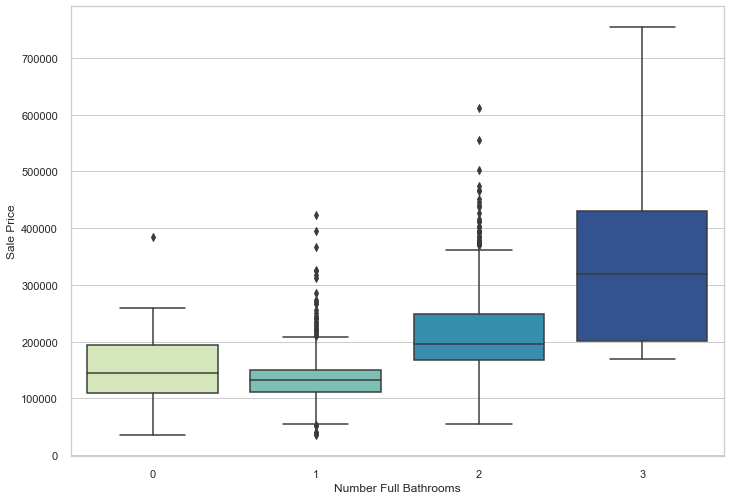

In [1825]:
# Visualize sales price to full bathrooms
ax = sns.boxplot(x='FullBath', y='SalePrice', data=train, palette='YlGnBu')
ax.set(xlabel='Number Full Bathrooms', ylabel='Sale Price')

[Text(0.5, 0, 'Kitchen Quality'), Text(0, 0.5, 'Sale Price')]

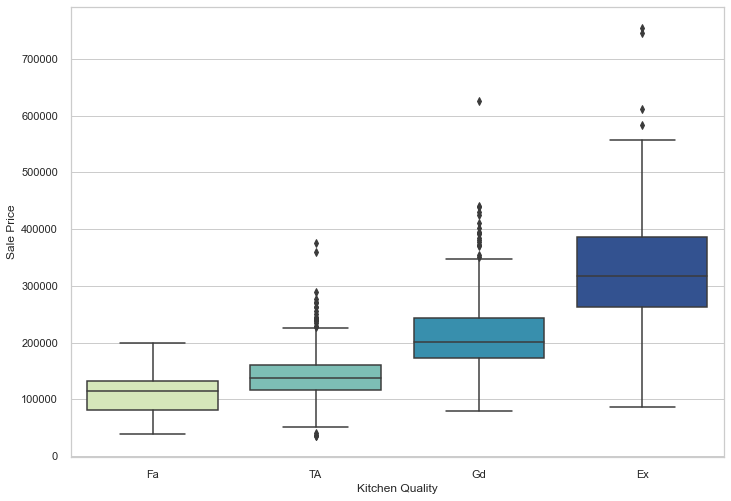

In [1826]:
# Visualize sales price to overall kitchen quality
ax = sns.boxplot(x='KitchenQual', y='SalePrice', data=train, palette='YlGnBu',
                order=['Fa', 'TA', 'Gd', 'Ex'])
ax.set(xlabel='Kitchen Quality', ylabel='Sale Price')

[Text(0.5, 0, 'Number of Fireplaces'), Text(0, 0.5, 'Sale Price')]

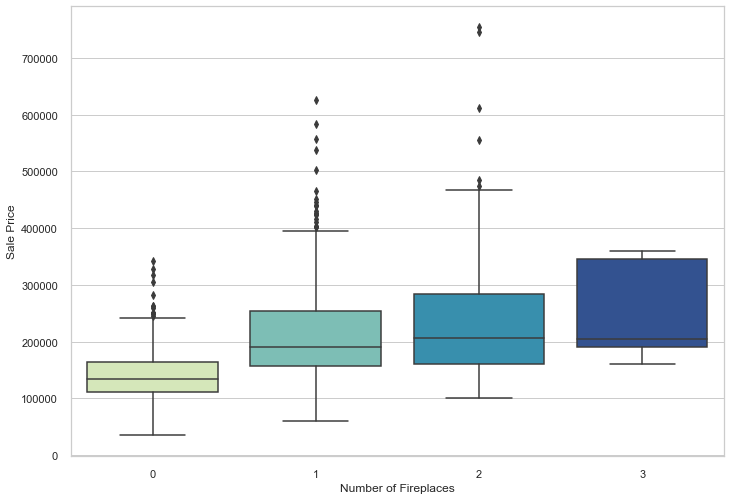

In [1827]:
# Visualize sales price to number fireplaces
ax = sns.boxplot(x='Fireplaces', y='SalePrice', data=train, palette='YlGnBu')
ax.set(xlabel='Number of Fireplaces', ylabel='Sale Price')

[Text(0.5, 0, 'Number Car Garage'), Text(0, 0.5, 'Sale Price')]

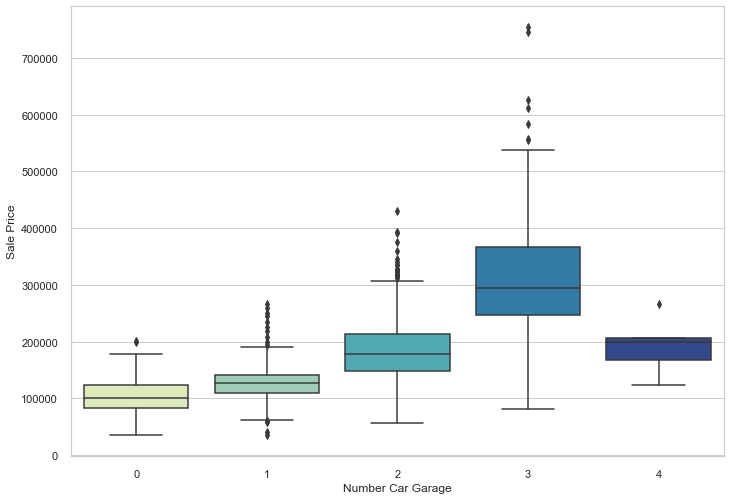

In [1828]:
# Visualize sales price to number cars fit in garage
ax = sns.boxplot(x='GarageCars', y='SalePrice', data=train, palette='YlGnBu')
ax.set(xlabel='Number Car Garage', ylabel='Sale Price')

In [1829]:
train[train['GarageCars']==4]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,421,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,200.0,TA,Gd,PConc,Gd,Gd,Gd,GLQ,1309,Unf,0,35,1344,GasA,Ex,Y,SBrkr,1344,0,0,1344,2,0,2,0,2,2,TA,8,Typ,0,NaN,Attchd,1997.0,Fin,4,784,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,GasW,TA,N,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4,864,TA,TA,N,181,0,386,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1340,1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,858,858,GasA,TA,Y,SBrkr,872,0,0,872,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1974.0,Unf,4,480,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,TA,TA,CBlock,TA,TA,No,LwQ,500,Unf,0,748,1248,GasA,TA,Y,SBrkr,1338,1296,0,2634,1,1,2,2,6,2,TA,12,Typ,0,NaN,Detchd,1969.0,Unf,4,968,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


## Handling null values

In [1830]:
# Output too long
# pd.set_option('display.max_rows', 200)
# train.isna().sum()

In [1831]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [1832]:
# drop Id because irrelevant
# drop Pool quality because only 7 not NA, and Pool area tells us if there is a pool
# drop all non-residential zoning
# garage cars and garage size in sqft is redundant
train = train.drop(train[train.MSZoning.isin(['FV', 'C (all)'])].index)
train.drop(['Id', 'PoolQC', 'GarageCars'], axis=1, inplace=True)
test.drop(['Id', 'PoolQC', 'GarageCars'], axis=1, inplace=True)

In [1833]:
# slab foundations have no basement, fill nan
train.BsmtQual=np.where(train.Foundation=='Slab',train.BsmtQual.fillna('None'),train.BsmtQual)
train.BsmtCond=np.where(train.Foundation=='Slab',train.BsmtCond.fillna('None'),train.BsmtCond)
train.BsmtExposure=np.where(train.Foundation=='Slab',train.BsmtExposure.fillna('None'),train.BsmtExposure)
train.BsmtFinType1=np.where(train.Foundation=='Slab',train.BsmtFinType1.fillna('None'),train.BsmtFinType1)
train.BsmtFinType2=np.where(train.Foundation=='Slab',train.BsmtFinType2.fillna('None'),train.BsmtFinType2)
# per data source, nan in these columns means condition does not exist
train.Fence.fillna('None', inplace=True)
train.FireplaceQu.fillna('None', inplace=True)
train.GarageType.fillna('None', inplace=True)
train.GarageFinish.fillna('None', inplace=True)
train.GarageQual.fillna('None', inplace=True)
train.GarageCond.fillna('None', inplace=True)
train.Alley.fillna('No_access', inplace=True)
train.MiscFeature.fillna('None', inplace=True)
# Likely no garage, but fill nan with mean year bc 0 would skew data
# fill nan to avoid removing rows or column
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace=True)

# perform same nan handling to test set
test.BsmtQual=np.where(test.Foundation=='Slab',test.BsmtQual.fillna('None'),test.BsmtQual)
test.BsmtCond=np.where(test.Foundation=='Slab',test.BsmtCond.fillna('None'),test.BsmtCond)
test.BsmtExposure=np.where(test.Foundation=='Slab',test.BsmtExposure.fillna('None'),test.BsmtExposure)
test.BsmtFinType1=np.where(test.Foundation=='Slab',test.BsmtFinType1.fillna('None'),test.BsmtFinType1)
test.BsmtFinType2=np.where(test.Foundation=='Slab',test.BsmtFinType2.fillna('None'),test.BsmtFinType2)
test.Fence.fillna('None', inplace=True)
test.FireplaceQu.fillna('None', inplace=True)
test.GarageType.fillna('None', inplace=True)
test.GarageFinish.fillna('None', inplace=True)
test.GarageQual.fillna('None', inplace=True)
test.GarageCond.fillna('None', inplace=True)
test.Alley.fillna('No_access', inplace=True)
test.MiscFeature.fillna('None', inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean(), inplace=True)


In [1834]:
# Output too long
# train.isna().sum()

In [1835]:
# check if related to any other variable
train[train['MasVnrArea'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,440,TA,TA,Y,288,48,0,0,0,0,None,None,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,No_access,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,484,TA,TA,Y,0,0,200,0,0,0,None,None,0,3,2007,WD,Alloca,200624
936,20,RL,67.0,10083,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,None,Attchd,2003.0,RFn,555,TA,TA,Y,0,41,0,0,0,0,None,None,0,8,2009,WD,Normal,184900
1243,20,RL,107.0,13891,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,850,TA,TA,Y,216,229,0,0,0,0,None,None,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,577,TA,TA,Y,0,211,0,0,0,0,None,None,0,3,2008,WD,Normal,237000


In [1836]:
# check if related to any other variable
train[train['BsmtQual'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,None,None,1977.336141,None,0,None,None,N,0,0,0,0,0,0,None,None,0,6,2008,WD,AdjLand,82000
156,20,RL,60.0,7200,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,None,Detchd,1950.000000,Unf,625,TA,TA,Y,0,0,0,0,0,0,None,None,0,6,2006,WD,Normal,109500
182,20,RL,60.0,9060,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.000000,RFn,252,TA,TA,Y,116,0,0,180,0,0,MnPrv,None,0,6,2007,WD,Normal,120000
259,20,RM,70.0,12702,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,None,Detchd,1956.000000,Unf,308,TA,TA,Y,0,45,0,0,0,0,None,None,0,12,2008,WD,Normal,97000
371,50,RL,80.0,17120,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991.000000,Fin,680,TA,TA,N,0,59,0,0,0,0,None,None,0,7,2008,WD,Normal,134432
520,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,7,1900,2000,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseA,694,600,0,1294,0,0,2,0,3,2,TA,7,Typ,0,None,None,1977.336141,None,0,None,None,N,220,114,210,0,0,0,None,None,0,8,2008,WD,Normal,106250
553,20,RL,67.0,8777,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,None,Detchd,2002.000000,Fin,520,TA,TA,N,0,96,0,0,0,0,MnPrv,None,0,5,2009,WD,Normal,108000
646,20,RL,60.0,7200,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1950,1950,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,SBrkr,1048,0,0,1048,0,0,1,0,3,1,TA,7,Min1,0,None,Detchd,1950.000000,Unf,420,TA,TA,Y,0,27,0,0,0,0,None,None,0,7,2008,WD,Normal,98300
736,90,RL,60.0,8544,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1950,1950,Gable,CompShg,Stucco,Stone,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,N,FuseF,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,None,Detchd,1949.000000,Unf,400,TA,TA,Y,0,0,0,0,0,0,None,None,0,7,2006,WD,Normal,93500
984,90,RL,75.0,10125,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1.5Fin,5,5,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1302,432,0,1734,0,

In [1837]:
# when basemnet quality is nan, all other basement variables are nan. Indicates there is no basement
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train.BsmtCond=np.where(train.BsmtQual=='None',train.BsmtCond.fillna('None'),train.BsmtCond)
train.BsmtExposure=np.where(train.BsmtQual=='None',train.BsmtExposure.fillna('None'),train.BsmtExposure)
train.BsmtFinType1=np.where(train.BsmtQual=='None',train.BsmtFinType1.fillna('None'),train.BsmtFinType1)
train.BsmtFinType2=np.where(train.BsmtQual=='None',train.BsmtFinType2.fillna('None'),train.BsmtFinType2)

# same nan handling on test set
test['BsmtQual'] = test['BsmtQual'].fillna('None')
test.BsmtCond=np.where(test.BsmtQual=='None',test.BsmtCond.fillna('None'),test.BsmtCond)
test.BsmtExposure=np.where(test.BsmtQual=='None',test.BsmtExposure.fillna('None'),test.BsmtExposure)
test.BsmtFinType1=np.where(test.BsmtQual=='None',test.BsmtFinType1.fillna('None'),test.BsmtFinType1)
test.BsmtFinType2=np.where(test.BsmtQual=='None',test.BsmtFinType2.fillna('None'),test.BsmtFinType2)


In [1838]:
# train.isna().sum()

In [1839]:
# fill residual categorical variable nans with mode
train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0], inplace=True)
train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0], inplace=True)
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0], inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
# fill residual numerical variable nans with mean
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace=True)
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)


# same on test set
test['LotFrontage'] = test.groupby('LotArea')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0], inplace=True)
test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0], inplace=True)
test['MasVnrType'].fillna(test['MasVnrType'].mode()[0], inplace=True)
test['Electrical'].fillna(test['Electrical'].mode()[0], inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].mean(), inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace=True)


In [1840]:
train.isnull().values.any()

False

In [1841]:
test.isnull().values.any()

True

In [1842]:
# test.isna().sum()

In [1843]:
# drop rows from test set
test = test.dropna() 
test.isnull().values.any()

False

In [1844]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No_access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No_access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No_access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No_access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,0,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No_access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,None,None,0,12,2008,WD,Normal,250000


## Encoding categorical features 

In [1845]:
# create ordering for ordinal features
quality_order = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
basement_fin = {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
functional_order = {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}


# transform each category to its numeric order using map
train['ExterQual'] = train.ExterQual.map(quality_order)
train['ExterCond'] = train.ExterCond.map(quality_order)
train['BsmtQual'] = train.BsmtQual.map(quality_order)
train['BsmtCond'] = train.BsmtCond.map(quality_order)
train['HeatingQC'] = train.HeatingQC.map(quality_order)
train['KitchenQual'] = train.KitchenQual.map(quality_order)
train['FireplaceQu'] = train.FireplaceQu.map(quality_order)
train['GarageQual'] = train.GarageQual.map(quality_order)
train['GarageCond'] = train.GarageCond.map(quality_order)

train['BsmtFinType1'] = train.BsmtFinType1.map(basement_fin)
train['BsmtFinType2'] = train.BsmtFinType2.map(basement_fin)

train['Functional'] = train.Functional.map(functional_order)


# Do same for test data

# transform each category to its numeric order using map
test['ExterQual'] = test.ExterQual.map(quality_order)
test['ExterCond'] = test.ExterCond.map(quality_order)
test['BsmtQual'] = test.BsmtQual.map(quality_order)
test['BsmtCond'] = test.BsmtCond.map(quality_order)
test['HeatingQC'] = test.HeatingQC.map(quality_order)
test['KitchenQual'] = test.KitchenQual.map(quality_order)
test['FireplaceQu'] = test.FireplaceQu.map(quality_order)
test['GarageQual'] = test.GarageQual.map(quality_order)
test['GarageCond'] = test.GarageCond.map(quality_order)

test['BsmtFinType1'] = test.BsmtFinType1.map(basement_fin)
test['BsmtFinType2'] = test.BsmtFinType2.map(basement_fin)

test['Functional'] = test.Functional.map(functional_order)


In [1846]:
# dummy encode nominal categorical variables
train = pd.get_dummies(train, columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                                      'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                                      'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                      'Exterior2nd', 'MasVnrType', 'Foundation','BsmtExposure', 
                                      'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish',
                                      'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
                       drop_first=True)

test = pd.get_dummies(test, columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                                      'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                                      'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                      'Exterior2nd', 'MasVnrType', 'Foundation','BsmtExposure', 
                                      'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish',
                                      'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
                       drop_first=True)

## Visualize our most significant features

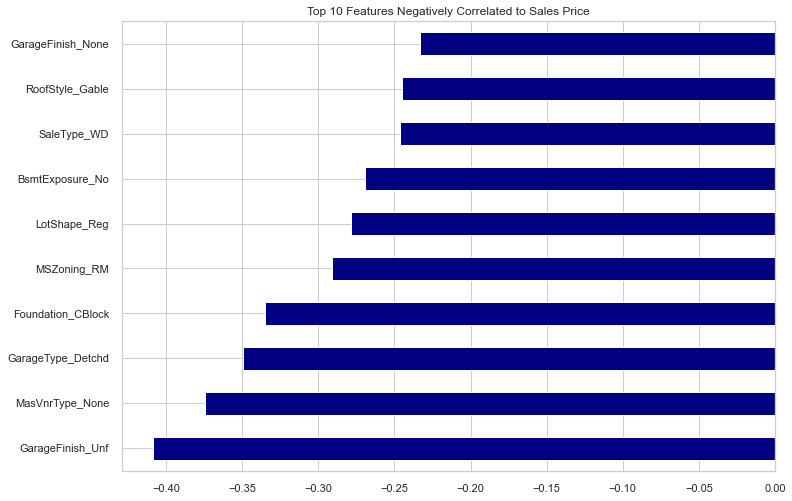

In [1847]:
# visualize negatively correlated features
df_corr = train.corr()['SalePrice'].sort_values(ascending=True).head(10)
df_corr.plot(kind='barh', color='navy')
plt.title('Top 10 Features Negatively Correlated to Sales Price')
plt.show()

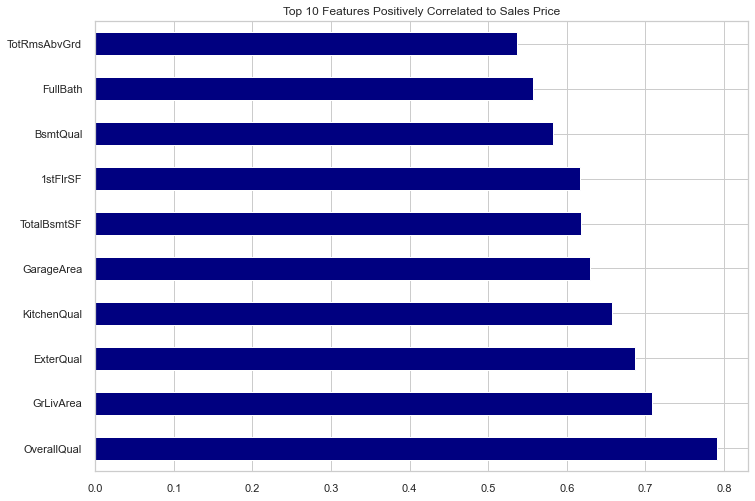

In [1801]:
# visualize positively correlated features
df_corr = train.corr()['SalePrice'].sort_values(ascending=False)[1:11]
df_corr.plot(kind='barh', color='navy')
plt.title('Top 10 Features Positively Correlated to Sales Price')
plt.show()

In [1620]:
# split into independent and dependent variables
X = train.drop(['SalePrice'], axis=1)
y = train.SalePrice

In [1621]:
# Split training data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

## Remove outliers

In [1623]:
from sklearn.ensemble import IsolationForest
# Identify and remove outliers
clf = IsolationForest(random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X_train)
X_train_cleaned = X_train[np.where(preds == 1, True, False)]
y_train_cleaned = y_train[np.where(preds == 1, True, False)]
print('There were {} points in the original training data. After removing outliers there are {} points.'
      .format(len(X_train),len(X_train_cleaned)))

There were 969 points in the original training data. After removing outliers there are 961 points.


In [1647]:
train.shape

(1385, 211)

## Scale data

In [1624]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train_cleaned)

# transform all other data
X_train_norm = norm.transform(X_train_cleaned)
X_val_norm = norm.transform(X_val)

## Feature Selection

In [1702]:
fs = SelectKBest(score_func=f_regression, k=175)

# fit feature selection model on training data
fs = fs.fit(X_train_norm, y_train_cleaned)
# transform all other data
X_train_fs = fs.transform(X_train_norm)
X_val_fs = fs.transform(X_val_norm)

In [1703]:
# Print most important features
df_scores = pd.DataFrame(fs.scores_)
df_columns = pd.DataFrame(X_train.columns)
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']
print(feature_scores.nlargest(10,'Score'))

   Feature_Name        Score
3   OverallQual  1744.565211
22    GrLivArea  1191.365440
8     ExterQual   842.379956
17  TotalBsmtSF   729.116482
29  KitchenQual   700.834252
19     1stFlrSF   694.994522
35   GarageArea   684.941149
10     BsmtQual   483.864049
25     FullBath   407.779605
33  FireplaceQu   394.581577


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Overall Quality'),
  Text(1, 0, 'Living Room sqft'),
  Text(2, 0, 'Exterior Quality'),
  Text(3, 0, 'Basement sqft'),
  Text(4, 0, 'Kitchen Quality'),
  Text(5, 0, 'Main Floor sqft'),
  Text(6, 0, 'Garage Size'),
  Text(7, 0, 'Basement Quality'),
  Text(8, 0, 'Full Bathrooms'),
  Text(9, 0, 'Fireplace Quality')])

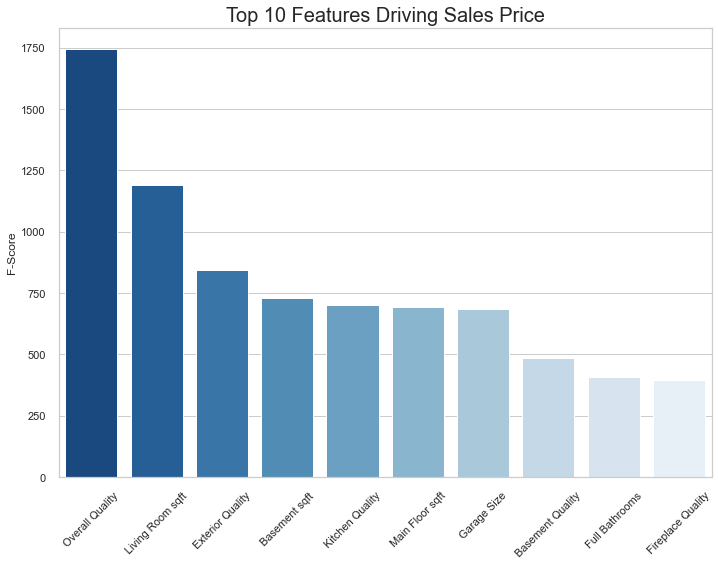

In [1704]:
top_features=feature_scores.nlargest(10,'Score')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid', {'axes.grid' : True})
ax = sns.barplot(x='Feature_Name', y='Score', data=top_features,
                 palette='Blues_r')
ax.set(xticklabels=['Overall Quality', 'Living Room sqft', 'Exterior Quality','Basement sqft', 'Kitchen Quality', 
                   'Main Floor sqft', 'Garage Size', 'Basement Quality', 'Full Bathrooms', 'Fireplace Quality'])
ax.set_title('Top 10 Features Driving Sales Price',fontsize= 20) 
ax.set_xlabel('')
ax.set_ylabel('F-Score')
plt.xticks(rotation=45)

## Linear Regression

In [1705]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression().fit(X_train_fs, y_train_cleaned)
y_pred = lin.predict(X_val_fs)

In [1706]:
r2 = r2_score(y_pred, y_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
print("The Linear Regression model's R2 = {:.3f} and RMSE = {:.0f}".format(r2,rmse))

The Linear Regression model's R2 = 0.872 and RMSE = 27514


## Ridge Regression

In [1707]:
from sklearn.linear_model import Ridge
param_grid = {'alpha': [5,6,7,8]}
ridge = Ridge()
g_search = GridSearchCV(estimator=ridge, param_grid=param_grid, verbose=0)
g_search.fit(X_train_fs, y_train_cleaned)
print(g_search.best_estimator_.alpha)
g_search.best_score_

5


0.8838328070133773

In [1708]:
# Train model with grid values
ridge = Ridge(alpha=5).fit(X_train_fs, y_train_cleaned)
# check how validation data compares
y_pred = ridge.predict(X_val_fs)

In [1709]:
r2 = r2_score(y_pred, y_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
print("The Ridge Regression model's R2 = {:.3f} and RMSE = {:.0f}".format(r2,rmse))

The Ridge Regression model's R2 = 0.899 and RMSE = 23262


## Lasso Regression

In [1710]:
from sklearn.linear_model import Lasso
param_grid = {'alpha': [50, 55, 60, 65, 70]}
lasso = Lasso()
g_search = GridSearchCV(estimator=lasso, param_grid=param_grid)
g_search.fit(X_train_fs, y_train_cleaned)
print(g_search.best_estimator_.alpha)
g_search.best_score_

55


0.8891084881789736

In [1813]:
lasso = Lasso(alpha=55).fit(X_train_fs, y_train_cleaned)
y_pred = lasso.predict(X_val_fs)

In [1712]:
r2 = r2_score(y_pred, y_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
print("The Lasso Regression model's R2 = {:.3f} and RMSE = {:.0f}".format(r2,rmse))

The Lasso Regression model's R2 = 0.895 and RMSE = 23892


## RandomForest Regression

In [1719]:
from sklearn.ensemble import RandomForestRegressor

param_grid ={'max_depth': [20, 35, 50],
             'max_features': ['auto', 'log2', 'sqrt'],
             'min_samples_split': [2, 3],
             'n_estimators': [200, 225, 250, 275]
            }
rfr = RandomForestRegressor(random_state = 1)
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, verbose=1, cv = 3)
g_search.fit(X_train_fs, y_train_cleaned);
print(g_search.best_params_)
g_search.best_score_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  3.7min finished


{'max_depth': 35, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 250}


0.8815566187479771

In [1720]:
rfr = RandomForestRegressor(bootstrap=True, max_depth=35, max_features='auto',
                            min_samples_leaf=1, min_samples_split=2,
                           n_estimators=250).fit(X_train_fs, y_train_cleaned)
y_pred = rfr.predict(X_val_fs)

In [1721]:
r2 = r2_score(y_pred, y_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
print("The RandomForest Regression model's R2 = {:.3f} and RMSE = {:.0f}".format(r2,rmse))

The RandomForest Regression model's R2 = 0.868 and RMSE = 25053


## Decision Tree Regression

In [1725]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_depth': [5,10,15],
              'min_samples_split': [2,3],
             'min_samples_leaf': [2,3,4,5],
             'max_features': ['auto', 'sqrt', 'log2', None],
             'max_leaf_nodes': [45, 55, 60, 65]
             }
tree = DecisionTreeRegressor(random_state=1)
g_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=3, verbose=1)
g_search.fit(X_train_fs, y_train_cleaned);
print(g_search.best_params_)
g_search.best_score_

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 60, 'min_samples_leaf': 4, 'min_samples_split': 2}


[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed:    7.1s finished


0.7502263971260735

In [1726]:
tree = DecisionTreeRegressor(max_depth=10, max_features='auto', max_leaf_nodes=60, min_samples_leaf=4,
                             min_samples_split=2).fit(X_train_fs, y_train_cleaned)
y_pred = tree.predict(X_val_fs)

In [1727]:
r2 = r2_score(y_pred, y_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
print("The Decision Tree Regression model's R2 = {:.3f} and RMSE = {:.0f}".format(r2,rmse))

The Decision Tree Regression model's R2 = 0.768 and RMSE = 33264


## Support Vector Regression

In [1741]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ('linear', 'rbf','poly','sigmoid'), 'C':[1000, 5000, 10000],
              'gamma': [1e-12, 1e-11, 1e-10],'epsilon':[0.5, 1]
             }
svr = SVR()
g_search = GridSearchCV(svr, param_grid, cv=3, verbose=1).fit(X_train_fs,y_train_cleaned)
print(g_search.best_params_)
g_search.best_score_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   23.7s finished


{'C': 10000, 'epsilon': 1, 'gamma': 1e-12, 'kernel': 'linear'}


0.8644226746456107

In [1746]:
regressor = SVR(kernel = 'linear', C=10000).fit(X_train_fs, y_train_cleaned)
y_pred = regressor.predict(X_val_fs)

In [1747]:
r2 = r2_score(y_pred, y_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
print("The Support Vector Regression model's R2 = {:.3f} and RMSE = {:.0f}".format(r2,rmse))

The Support Vector Regression model's R2 = 0.863 and RMSE = 24813


## XGBoost Regression

In [1770]:
from xgboost import XGBRegressor
param_grid = {'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [4, 5],
        'subsample': [0.5, 0.6],
        'colsample_bytree': [0.6, 0.7],
        'n_estimators' : [1000, 1500, 2000]
    }
xgb = XGBRegressor()
g_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, verbose=1).fit(X_train_fs, y_train_cleaned)
print(g_search.best_params_)
g_search.best_score_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed: 17.2min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 2000, 'subsample': 0.6}


0.9171461076074751

In [1756]:
xgb = XGBRegressor(learning_rate =0.01, max_depth=5, min_child_weight=4, subsample=0.6,
                  colsample_bytree= 0.7, n_estimators=2000).fit(X_train_fs, y_train_cleaned)
y_pred = xgb.predict(X_val_fs)

In [1809]:
r2 = r2_score(y_pred, y_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
print("The XGBoost Regression model's R2 = {:.3f} and RMSE = {:.0f}".format(r2,rmse))

The XGBoost Regression model's R2 = 0.924 and RMSE = 19867


## Visualizing Model Performance

In [1802]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

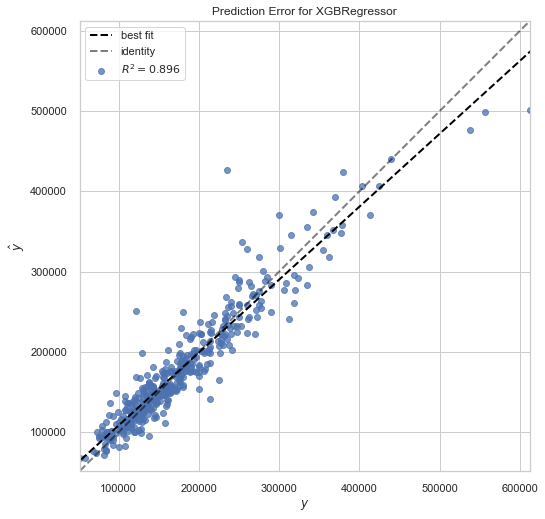

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [1816]:
model1 = xgb
visualizer = PredictionError(model1, line_color='black')
visualizer.fit(X_train_fs, y_train_cleaned)  
visualizer.score(X_val_fs, y_val)  
visualizer.poof()

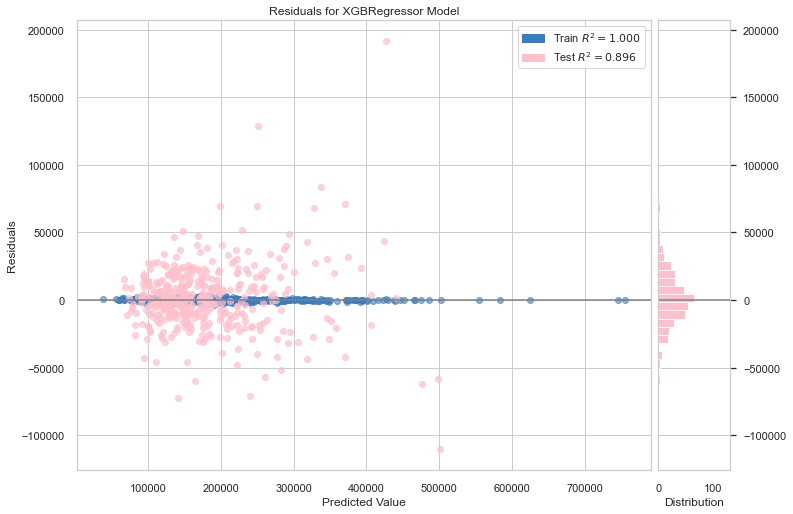

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [1817]:
visualizer = ResidualsPlot(model1, test_color='pink', test_alpha=0.7, train_color='#357EC7',
                          train_alpha=0.6, line_color='grey')
visualizer.fit(X_train_fs, y_train_cleaned)  
visualizer.score(X_val_fs, y_val)    
visualizer.poof()